In [1]:
import pandas as pd
import numpy as np

# Read n rows from the embedded data
df = pd.read_csv('../../data/articles_avg_token.csv')
label_vectors = pd.read_csv('../../data/categories_avg_token.csv')

X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [2]:
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn.metrics import accuracy_score as acc_score

pred = np.argmax(cs(X, label_vectors), axis = 1)
print(acc_score(y,pred))

0.6553333333333333


In [41]:
print("Accuracy with kmeans clustering using cosine distancing measure")
cos_kmeans_labels = kmeans_pred(X,y, label_vectors, len(label_vectors));

Accuracy with kmeans clustering


C:\Users\adamv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


0.7740833333333333


Accuracy with kmeans clustering


C:\Users\adamv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


0.7740833333333333


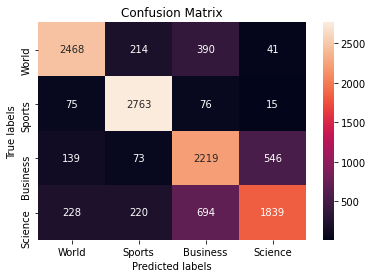

In [3]:
import sys, os
sys.path.append(os.path.abspath('../'))
from helper_functions import kmeans_pred

print("Accuracy with kmeans clustering")
kmeans_labels = kmeans_pred(X,y, label_vectors, len(label_vectors));

import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.metrics import accuracy_score as acc_score, confusion_matrix as cm

labels = ["World","Sports","Business","Science"]

ax= plt.subplot()
sns.heatmap(cm(y, kmeans_labels), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [4]:
from sklearn.manifold import TSNE

# Use T-sne to get the data from 128 to 2 dimensions
data = np.append(X, label_vectors, axis=0)
data_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(data)
X_embedded = data_embedded[:-4,:]
labels_embedded = data_embedded[-4:,:]

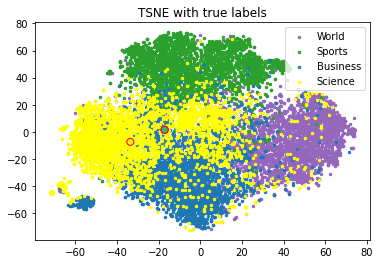

In [38]:
import matplotlib.pyplot as plt

labels = ["World","Sports","Business","Science"]
cdict = {0: 'tab:purple', 3: 'yellow', 2: 'tab:blue', 1: 'tab:green'}

fig, ax = plt.subplots()
ax.set_title("TSNE with true labels")
for point in np.unique(y):
    ix = np.where(y == point)
    ax.scatter(X_embedded[ix,0], X_embedded[ix,1], c = cdict[point], label = point, s = 6)
ax.scatter(labels_embedded[:,0], labels_embedded[:,1], c= list(range(len(labels))), s = 50, edgecolors='r')
ax.legend(labels);


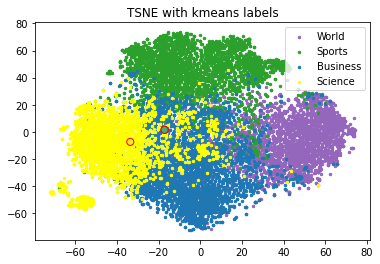

In [40]:
fig, ax = plt.subplots()
ax.set_title("TSNE with kmeans labels")
for point in np.unique(kmeans_labels):
    ix = np.where(kmeans_labels == point)
    ax.scatter(X_embedded[ix,0], X_embedded[ix,1], c = cdict[point], label = point, s = 6)
plt.scatter(labels_embedded[:,0], labels_embedded[:,1], c= list(range(len(labels))), s = 50, edgecolors='r')
ax.legend(labels);